![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None

Missing Values:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


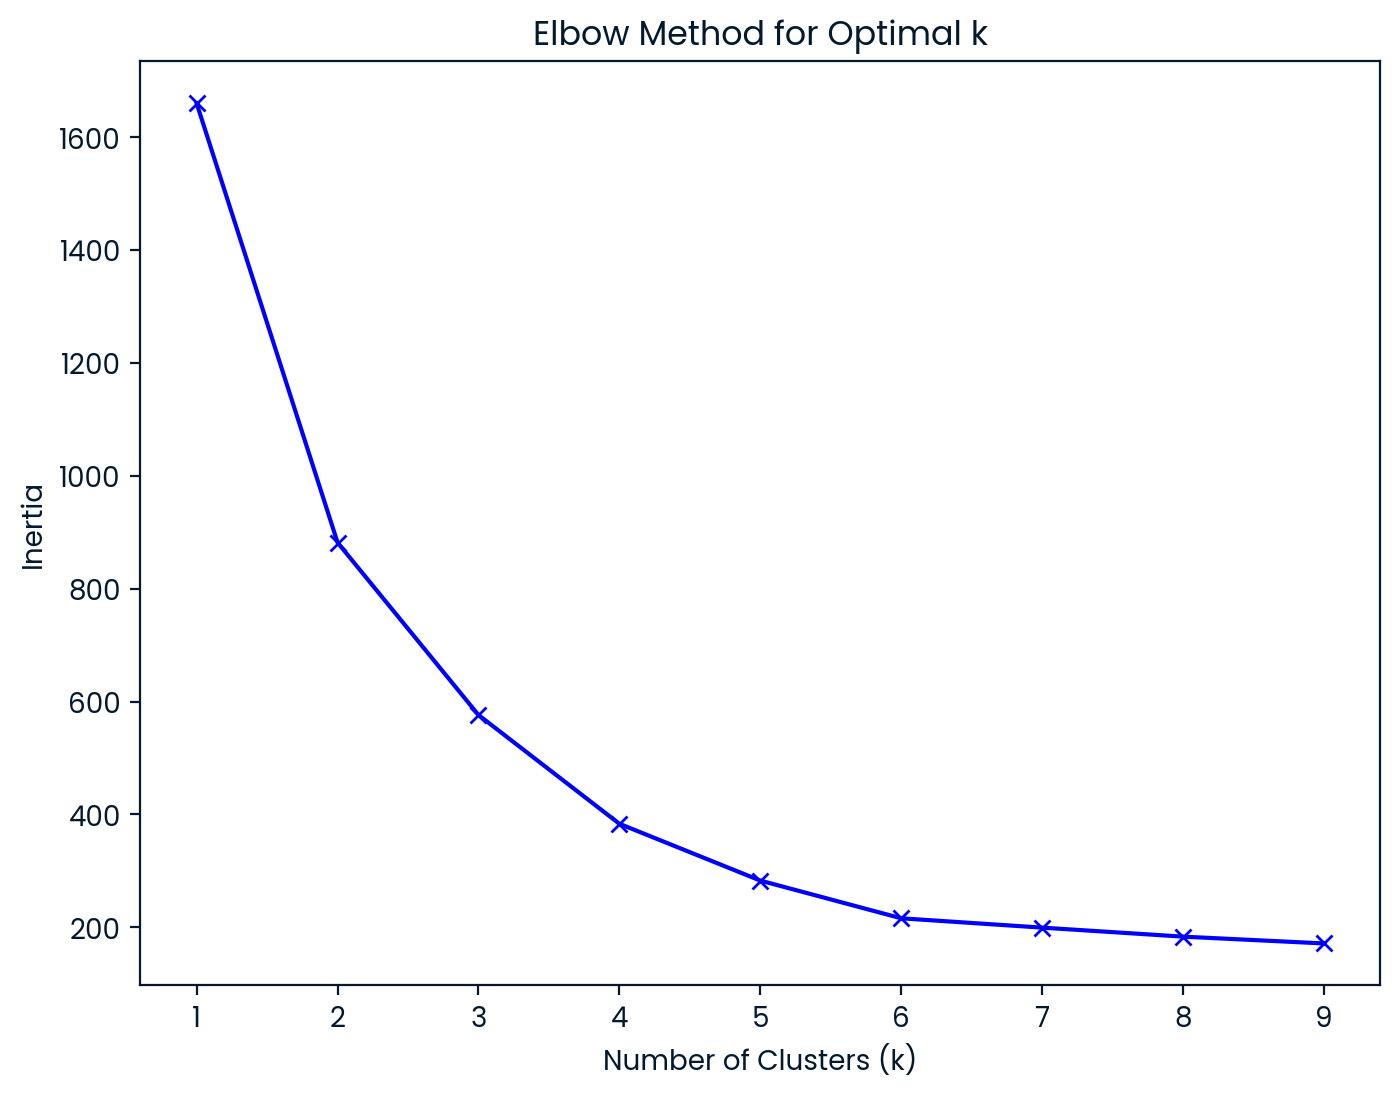


Mean values for each cluster:
         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
cluster                                     ...                       
0               43.878302        19.111321  ...  4006.603774  1.000000
1               47.568067        14.996639  ...  5092.436975  0.512605
2               40.217757        17.611215  ...  3419.158879  0.000000

[3 rows x 5 columns]


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('penguins.csv')

# Investigating the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Pre-processing: Drop rows with missing values
df = df.dropna()

# Creating dummy variables for 'sex' column
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Selecting numeric features for clustering
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_MALE']
X = df[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choosing 3 clusters based on the elbow method and domain knowledge (3 species)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Calculating mean values for each cluster
stat_penguins = df.groupby('cluster')[features].mean()

# Displaying the resulting DataFrame
print("\nMean values for each cluster:")
print(stat_penguins)

# Saving the results
stat_penguins.to_csv('stat_penguins.csv')

This script:

Imports necessary libraries (pandas, numpy, sklearn, matplotlib).
Loads and investigates the dataset, checking for missing values.
Drops rows with missing values to ensure clean data.
Creates a dummy variable for 'sex' (converting 'MALE' to 1, 'FEMALE' to 0).
Selects numeric features for clustering, including the dummy variable.
Scales the features using StandardScaler.
Applies the elbow method to visualize the optimal number of clusters.
Performs K-means clustering with 3 clusters (based on domain knowledge of 3 species).
Creates stat_penguins DataFrame with mean values of original variables per cluster.
Saves the results to a CSV file.
The stat_penguins DataFrame will have one row per cluster (3 rows) and columns for the mean values of culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, and sex_MALE.